# 関数 save_fig：プロット結果をファイルへ保存する

In [1]:
# 2バイト文字をグラフで扱うためのパッケージインストール
!pip install japanize-matplotlib

import os
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

def save_fig(plt, file_prefix, bbox_inches='tight'):
    if file_prefix == '':
        return

    parent = os.path.dirname(os.path.abspath(file_prefix))
    os.makedirs(parent, exist_ok=True)
    plt.savefig(f'{file_prefix}.pdf', transparent=True, bbox_inches=bbox_inches, pad_inches = 0.2)
    plt.savefig(f'{file_prefix}.png', transparent=True, dpi=300, bbox_inches=bbox_inches, pad_inches = 0.2)

import sys
from datetime import datetime
import uuid

def dmcode():
    t = datetime.now().strftime('%f%S%M%H%d%m%Y')
    buff = ['***DMCODE', t, str(uuid.uuid4())]
    print(' '.join(buff))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=d1ffd54c8899c20eb04b01ea6f3a5a3711c03cdd4201de1be6c6f03bd5f8f8f5
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


# 関数 show_segmentation_result：混合ガウスモデルによるセグメンテーション結果表示

In [2]:
def show_segmentation_result(original, segments, nc=5, file_prefix=''):
    segments = np.transpose(segments, (2, 0, 1))

    cols = 3
    rows = (1 + nc) // cols + (1 if (1 + nc) % cols != 0 else 0)

    plt.figure(figsize=(12, 8))
    plt.subplot(rows, cols, 1)
    plt.imshow(original / original.max(), cmap='gray', vmin=0, vmax=1)
    plt.colorbar()
    plt.title('Original')
    plt.axis('off')

    for i in range(nc):
        plt.subplot(rows, cols, i + 2)
        plt.title(f'Component {i+1}')
        plt.imshow(segments[i], cmap='gray', vmin=0, vmax=1)
        plt.colorbar()
        plt.axis('off')

    save_fig(plt, file_prefix=file_prefix)
    plt.show()

# 関数 show_mixgauss_prm：混合ガウスモデルによるクラスタリング結果の図示

In [3]:
import numpy as np
import matplotlib.pyplot as plt
X_col = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1], [0.5, 0, 0.5], [0, 0.5, 0.8]])

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

import numpy as np
def gauss(x, mu, sigma):
    N, D = x.shape
    c1 = 1 / (2 * np.pi)**(D / 2)
    c2 = 1 / (np.linalg.det(sigma)**(1 / 2))
    inv_sigma = np.linalg.inv(sigma)
    c3 = x - mu
    c4 = np.dot(c3, inv_sigma)
    c5 = np.zeros(N)
    for d in range(D):
        c5 = c5 + c4[:, d] * c3[:, d]
    p = c1 * c2 * np.exp(-c5 / 2)
    return p

def mixgauss(x, pi, mu, sigma):
    N, D = x.shape
    K = len(pi)
    p = np.zeros(N)
    for k in range(K):
        p = p + pi[k] * gauss(x, mu[k, :], sigma[k, :, :])
    return p

def show_contour_mixgauss(pi, mu, sigma, x_min=-10, x_max=20):
    xn = 50
    x0 = np.linspace(x_min, x_max, xn)
    x1 = np.linspace(x_min, x_max, xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.concatenate([xx0.reshape(-1, 1), xx1.reshape(-1, 1)], axis=1)
    f = mixgauss(x, pi, mu, sigma)
    f = f.reshape(xn, xn)
    plt.contour(x0, x1, f, 20, colors='gray')

def show_mixgauss_prm(x, gamma, pi, mu, sigma, file_prefix=''):
    plt.figure(figsize=(6, 6))
    N, D = x.shape

    show_contour_mixgauss(pi, mu, sigma)

    K = len(mu)
    for n in range(N):
        col = 0
        for k in range(K):
            col += gamma[n, k] * X_col[k]
        plt.plot(x[n, 0], x[n, 1], 'o', color=tuple(col), markeredgecolor='black',
                 markersize=6, alpha=0.5)

    for k in range(K):
        plt.plot(mu[k, 0], mu[k, 1], marker='*', markerfacecolor=tuple(X_col[k]),
                 markersize=15, markeredgecolor='k', markeredgewidth=1)

    plt.xlim(-10, 20)
    plt.ylim(-10, 20)
    # plt.xticks(fontsize=16)
    # plt.yticks(fontsize=16)
    plt.grid(True)
    plt.tight_layout()
    save_fig(plt, file_prefix=file_prefix)
    plt.show()

# 実習13.1：1次元配列に対するnp.concatenate

In [4]:
import numpy as np

# 全要素が1、要素数10の1次元配列を生成
a=np.ones(10)
print(a)
# 全要素が0、要素数10の1次元配列を生成
b=np.zeros(10) # 2個目の1次元配列
print(b)

# 1次元配列aとbを結合
c=np.concatenate([a,b])
print('cの形状:',c.shape)
print(c)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
cの形状: (20,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# 実習13.2：2次元配列に対するnp.concatenate

In [5]:
import numpy as np

# 全要素が1、要素数10の1次元配列を生成
a=np.ones(10)
a=a.reshape((5,2)) # 1次元配列aを5行2列の2次元配列に変形
print(a)
# 全要素が0、要素数10の1次元配列を生成
b=np.zeros(10)
b=b.reshape((5,2)) # 1次元配列bを5行2列の2次元配列に変形
print(b)

# 行方向に2次元配列aとbを結合
c=np.concatenate([a,b],axis=0)
print('cの形状:',c.shape)
print(c)

# 列方向に2次元配列aとbを結合
d=np.concatenate([a,b],axis=1)
print('dの形状:',d.shape)
print(d)

[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
cの形状: (10, 2)
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
dの形状: (5, 4)
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]]


# 実習13.3：1次元ガウス分布に従うデータの生成

全データ数 = 500
1個目のガウス分布の混合係数 = 0.8
2個目のガウス分布の混合係数 = 0.2


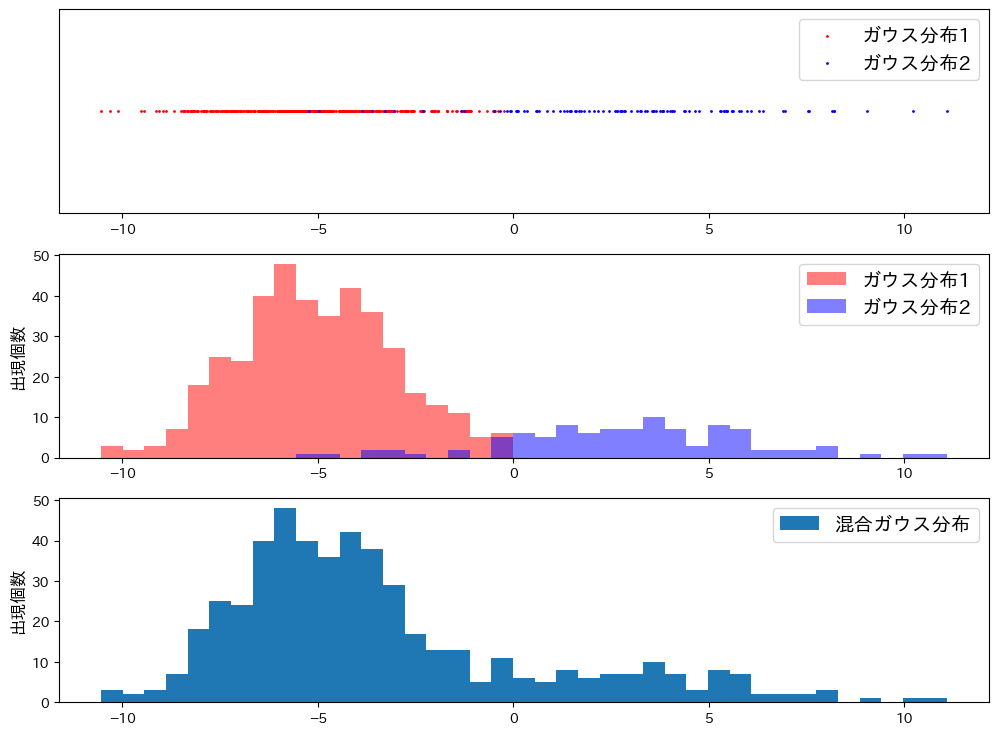

In [7]:
import numpy as np

np.random.seed(0) # 乱数シードを指定

# 1個目のガウス分布
m1=-5 # 平均
s1=2 # 標準偏差
n1=400 # データ数
# ガウス分布に従う乱数を生成
x1=np.random.normal(loc=m1,   # 平均
                    scale=s1, # 標準偏差
                    size=n1)  # データ数

# 2個目のガウス分布
m2=3 # 平均
s2=3 # 標準偏差
n2=100 # データ数
# ガウス分布に従う乱数を生成
x2=np.random.normal(loc=m2,   # 平均
                    scale=s2, # 標準偏差
                    size=n2)  # データ数

# 2個のガウス分布から生成した乱数から、データ数n1 + n2の1次元配列を生成
x=np.concatenate([x1,x2],axis=0)

p1=n1/(n1+n2) # 全データ数に対する1個目のガウス分布のデータの割合
p2=n2/(n1+n2) # 全データ数に対する2個目のガウス分布のデータの割合
print('全データ数 =',len(x))
print('1個目のガウス分布の混合係数 =',p1)
print('2個目のガウス分布の混合係数 =',p2)

# データの可視化
plt.figure(figsize=(12,9)) # 図のサイズ

# X軸をデータにプロットする
plt.subplot(3,1,1)
plt.scatter(x1,np.zeros(len(x1)),s=1,label='ガウス分布1',color='red')
plt.scatter(x2,np.zeros(len(x2)),s=1,label='ガウス分布2',color='blue')
plt.yticks([]) # Y軸の目盛りを非表示
plt.legend(fontsize=14) # 凡例の表示とその際のフォントサイズ
# データを40個の区間に区切り、各区間での出現個数を可視化する
bins=np.linspace(x.min(),x.max(),40)
plt.subplot(3,1,2)
plt.hist(x1,bins=bins,label='ガウス分布1',alpha=0.5,color='red')
plt.hist(x2,bins=bins,label='ガウス分布2',alpha=0.5,color='blue')
plt.legend(fontsize=14) # 凡例の表示とその際のフォントサイズ
plt.ylabel('出現個数', fontsize=12)

plt.subplot(3,1,3)
plt.hist(x,bins=bins,label='混合ガウス分布')
plt.legend(fontsize=14) # 凡例の表示とその際のフォントサイズ
plt.ylabel('出現個数', fontsize=12)

plt.show()

# 実習13.4：1次元データに対する混合ガウス分布に基づく確率的クラスタリング

In [12]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=2, # クラスタ数
                    covariance_type='full', # 想定する分散共分散行列のタイプ
                    random_state=0) # 乱数列を固定

# gmmへの入力用に1次元配列yを500行1列の2次元配列へ形状変形
x=x.reshape((-1,1))

# 混合ガウス分布による平均、分散、混合係数の推定
gmm.fit(x)

means=gmm.means_.flatten() # 平均の推定値
# 分散の推定値の平方根をとり標準偏差を計算
sigmas=np.sqrt(gmm.covariances_.flatten())
weights=gmm.weights_.flatten() # 混合係数の推定値

# 結果の表示
for i in range(2):
    print(f'{i+1}個目の推定ガウス分布')
    print('平均:',means[i])
    print('標準偏差:',sigmas[i])
    print('混合係数:',weights[i])

1個目の推定ガウス分布
平均: -5.083583752428356
標準偏差: 1.9581357735733258
混合係数: 0.7982553524018564
2個目の推定ガウス分布
平均: 2.9977311672280695
標準偏差: 2.9640540543407767
混合係数: 0.2017446475981436


# 実習13.5：2次元ガウス分布に従うデータの生成

真の混合係数: 0.3333333333333333 0.4 0.26666666666666666
データの形状: (150, 2)


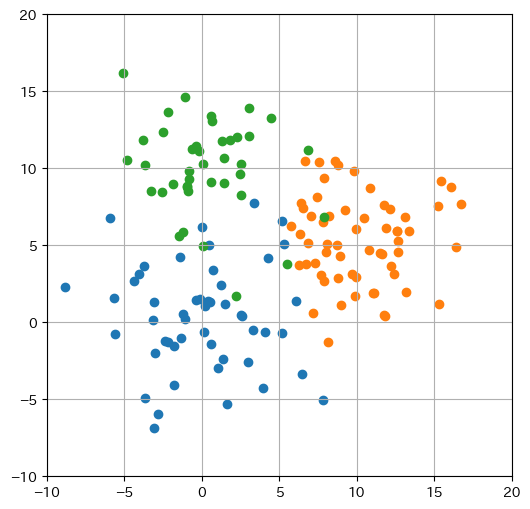

In [13]:
import numpy as np

np.random.seed(0) # 乱数シードを指定

# 1個目の2次元ガウス分布
m1=[0,0] # 平均
s1=[[12,0],[0,12]] # 分散共分散行列（第6回授業資料参照）
n1=50 # データ数
# 2次元ガウス分布に従うデータを生成
x1=np.random.multivariate_normal(m1,s1,n1)

# 2個目の2次元ガウス分布
m2=[10,5] # 平均
s2=[[8,0],[0,8]] # 分散共分散行列（第6回授業資料参照）
n2=60 # データ数
# 2次元ガウス分布に従うデータを生成
x2=np.random.multivariate_normal(m2,s2,n2)

# 3個目の2次元ガウス分布
m3=[1,10] # 平均
s3=[[9,0],[0,9]] # 分散共分散行列（第6回授業資料参照）
n3=40 # データ数
# 2次元ガウス分布に従うデータを生成
x3=np.random.multivariate_normal(m3,s3,n3)

pi1=n1/(n1+n2+n3) # 全データ数に対するガウス分布1のデータ数の割合
pi2=n2/(n1+n2+n3) # 全データ数に対するガウス分布2のデータ数の割合
pi3=n3/(n1+n2+n3) # 全データ数に対するガウス分布3のデータ数の割合
print(f'真の混合係数: {pi1} {pi2} {pi3}')

# 3つの2次元配列を行方向に結合し、1つの2次元配列にする
x=np.concatenate([x1,x2,x3],axis=0)
print('データの形状:',x.shape)

# データの分布を表示
plt.figure(figsize=(6,6))
plt.scatter(x1[:,0],x1[:,1])
plt.scatter(x2[:,0],x2[:,1])
plt.scatter(x3[:,0],x3[:,1])
plt.xlim(-10,20)
plt.ylim(-10,20)
plt.grid()
plt.show()

# 実習13.6：2次元データに対する混合ガウス分布に基づく確率的クラスタリング

1個目の推定ガウス分布
平均
[-0.20719399 -0.08365537]
分散共分散行列
[[12.01447092 -2.11934914]
 [-2.11934914  9.53010111]]
混合係数
0.31040611113738925
2個目の推定ガウス分布
平均
[9.63207062 5.3942778 ]
分散共分散行列
[[10.11296277 -0.25507411]
 [-0.25507411  8.08505242]]
混合係数
0.4453442756807475
3個目の推定ガウス分布
平均
[-0.22603771 10.47505013]
分散共分散行列
[[6.24663638 0.23714962]
 [0.23714962 6.10508724]]
混合係数
0.24424961318186328


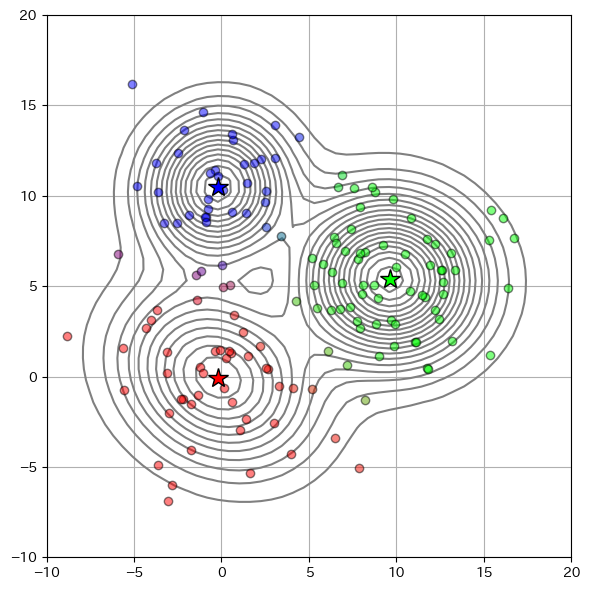

In [14]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=3,covariance_type='full',random_state=0)

# 混合ガウス分布による平均、分散共分散行列、混合係数の推定
gmm.fit(x)

means=gmm.means_ # 平均の推定値
sigmas=gmm.covariances_ # 分散共分散行列の推定値
weights=gmm.weights_ # 混合係数の推定値

# 結果の表示
for i in range(3):
    print(f'{i+1}個目の推定ガウス分布')
    print('平均')
    print(means[i])
    print('分散共分散行列')
    print(sigmas[i])
    print('混合係数')
    print(weights[i])

# 各データ点について、クラスタへの所属確率を取得
proba=gmm.predict_proba(x)
# 元のデータ点と推定したガウス分布を正規化
show_mixgauss_prm(x,proba,weights,means,sigmas)

# 実習13.7：MRI画像の読み込みと前処理

In [15]:
import numpy as np

# データの読み込み
data=np.fromfile('mri.img',dtype='float32')
print('画素数 =',len(data))
print('配列の形状:',data.shape)

# 読み込んだデータを説明変数1種類のデータとして扱うため、(データ数, 1)の形状に変換
data=data.reshape(len(data),1)
print('配列の形状:', data.shape)

画素数 = 65536
配列の形状: (65536,)
配列の形状: (65536, 1)


# 実習13.8：混合ガウスモデルに基づく確率的クラスタリングの応用

***DMCODE 30207530231126122023 c5d844b6-b5fa-424e-a8a7-fdadbf80b87f
画素数 = 65536


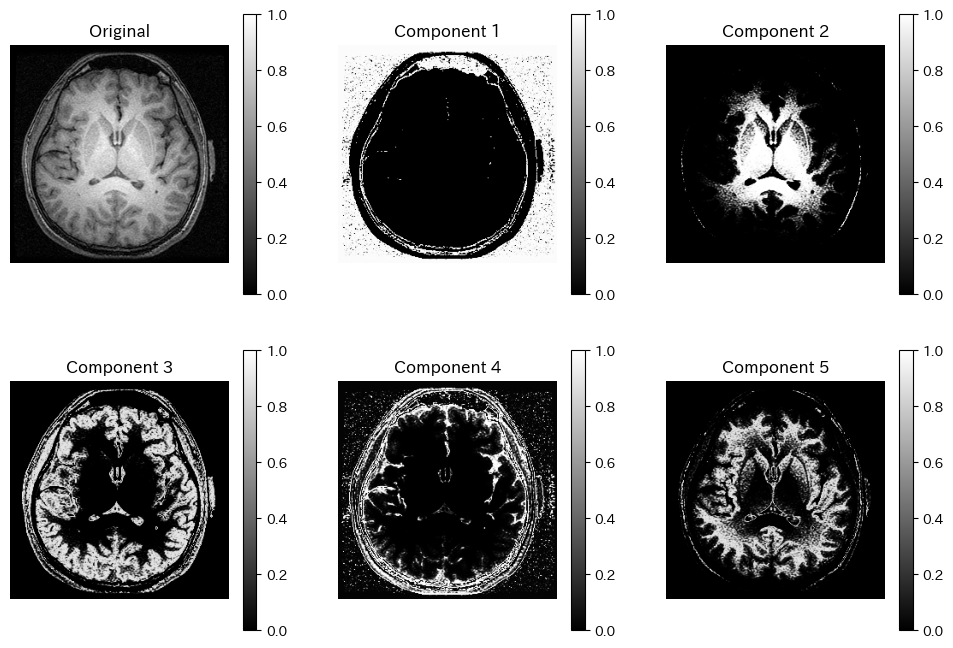

In [17]:
dmcode()
nx = 256 # 画像の横方向画素数
ny = 256 # 画像の縦方向画素数

# これ以降に必要なコードを記述する

import numpy as np

# データの読み込み
data=np.fromfile('mri.img',dtype='float32')
print('画素数 =',len(data))

# 読み込んだデータを説明変数1種類のデータとして扱うため、(データ数, 1)の形状に変換
data=data.reshape(len(data),1)

from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=5,covariance_type='full',random_state=0)

# 混合ガウス分布による平均、分散共分散行列、混合係数の推定
gmm.fit(data)

# 各データ点について、クラスタへの所属確率を取得
proba=gmm.predict_proba(data)

data=data.reshape(ny,nx)
proba=proba.reshape(ny,nx,5)

# 元のデータ点と推定したガウス分布を正規化
show_segmentation_result(data,proba)